In [ ]:
import pandas as pd
import os

def split_annotations(input_csv, directory1, directory2):
    annotations_df = pd.read_csv(input_csv)
    files_dir1 = os.listdir(directory1)
    files_dir2 = os.listdir(directory2)

    print("arquivos do diretório 1:")
    print(files_dir1)
    print("arquivos do diretório 2:")
    print(files_dir2)

    annotations_dir1 = annotations_df[annotations_df['img_name'].isin(files_dir1)]
    annotations_dir2 = annotations_df[annotations_df['img_name'].isin(files_dir2)]

    print("anotações do 1:")
    print(annotations_dir1)
    print("anotações do 2:")
    print(annotations_dir2)

    annotations_dir1.to_csv('test_label_filt.csv', index=False)
    annotations_dir2.to_csv('train_label_filt.csv', index=False)

directory1 = 'dataset/test/images'
directory2 = 'dataset/train/images'

input_csv = 'super-annotation.csv'

split_annotations(input_csv, directory1, directory2)

In [ ]:
input_csv = 'train_label_filt.csv'
output_csv1 = 'train_label_filt2.csv'
output_csv2 = 'train_label_filt_reorganized.csv'

df = pd.read_csv(input_csv)
df.to_csv(output_csv1, index=False)

df_reorganized = df[['label', 'x', 'y', 'width', 'height']]
df_reorganized['img_name'] = df['img_name']
df_reorganized = df_reorganized[['label', 'x', 'y', 'width', 'height', 'img_name']]

df_reorganized.to_csv(output_csv2, index=False)

In [ ]:
input_dir = ''
csv_filename = 'test_label_filt_reorganized.csv'

output_dir = 'dataset/test/labels'
os.makedirs(output_dir, exist_ok=True)
df = pd.read_csv(os.path.join(input_dir, csv_filename))

for index, row in df.iterrows():
    txt_filename = row['img_name'].split('.')[0] + '.txt'
    txt_content = f"{row['label']} {row['x']} {row['y']} {row['width']} {row['height']}"

    with open(os.path.join(output_dir, txt_filename), 'w') as txt_file:
        txt_file.write(txt_content)

In [ ]:
pasta_txt = '/content/drive/MyDrive/final_code/dataset/train/labels'

for nome_arquivo in os.listdir(pasta_txt):
    if nome_arquivo.endswith('.txt'):
        caminho_arquivo = os.path.join(pasta_txt, nome_arquivo)

        with open(caminho_arquivo, 'r') as arquivo:
            linhas = arquivo.readlines()

        with open(caminho_arquivo, 'w') as arquivo:
            for linha in linhas:
                partes = linha.split()
                if partes:
                    if partes[0] == '1':
                        partes[0] = '0'
                    arquivo.write(' '.join(partes) + '\n')

In [ ]:
caminho_pasta = '/content/drive/MyDrive/final_code/dataset/train/labels'

largura_imagem = 512
altura_imagem = 512

arquivos = os.listdir(caminho_pasta)

for nome_arquivo in arquivos:
    if nome_arquivo.endswith('.txt'):
        caminho_arquivo = os.path.join(caminho_pasta, nome_arquivo)

        with open(caminho_arquivo, 'r') as arquivo:
            linhas = arquivo.readlines()
        with open(caminho_arquivo, 'w') as arquivo:
            for linha in linhas:
                partes = linha.strip().split(' ')
                if len(partes) >= 5:
                    classe = partes[0]
                    x = float(partes[1]) / largura_imagem
                    y = float(partes[2]) / altura_imagem
                    largura = float(partes[3]) / largura_imagem
                    altura = float(partes[4]) / altura_imagem
                    arquivo.write(f'{classe} {x} {y} {largura} {altura}\n')

        print(f'Coordenadas normalizadas escritas em {caminho_arquivo}')

print('Conversão para coordenadas normalizadas concluída.')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!pip install --upgrade pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 19.4 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 26.4/201.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
os.chdir('/content/drive/MyDrive/final_code')

In [ ]:
!apt-get update
!apt-get install libgl1-mesa-glx -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [736 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,843 kB]
Get:13 http://security.ubuntu.com/ubuntu 

In [ ]:
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 173MB/s]

Transferred 355/355 items from pretrained weights


In [ ]:
%%writefile data.yaml
train: "/content/drive/MyDrive/lung_nodule/dataset/train"
val: "/content/drive/MyDrive/lung_nodule/dataset/test"

nc: 1  # number of classes
names: ['Nodule']

Writing data.yaml


In [ ]:
!yolo mode=train model=yolov8s.pt iou=0.5 imgsz=640 data=data.yaml epochs=50 batch=16 name=yolov8n_custom augment=false optimizer=AdamW lr0=0.0005 lrf=0.01 crop_fraction=0 fliplr=0 scale=0 translate=0 hsv_h=0 hsv_s=0 hsv_v=0

100% 21.5M/21.5M [00:00<00:00, 229MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

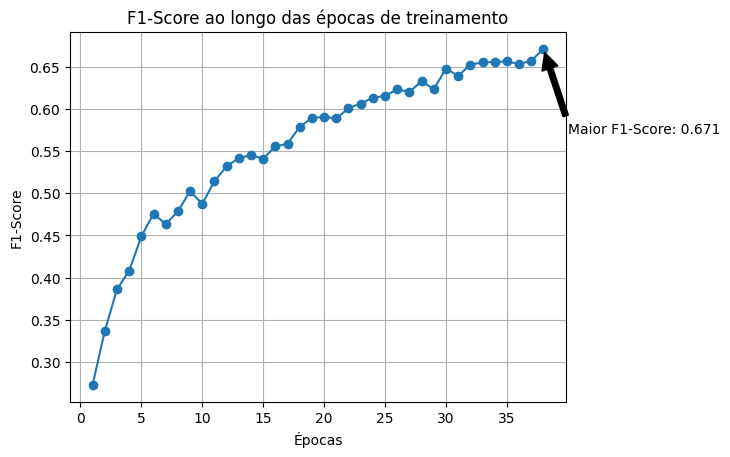

In [1]:
import matplotlib.pyplot as plt

precisions = [0.292, 0.35, 0.363, 0.407, 0.437, 0.463, 0.434, 0.456, 0.488, 0.459, 0.49, 0.521, 0.525, 0.532, 0.529, 0.553, 0.556, 0.617, 0.59, 0.593, 0.585, 0.615, 0.593, 0.629, 0.63, 0.626, 0.597, 0.651, 0.637, 0.644, 0.642, 0.641, 0.646, 0.655, 0.656, 0.654, 0.656, 0.68]
recalls = [0.256, 0.324, 0.412, 0.409, 0.461, 0.489, 0.497, 0.503, 0.518, 0.519, 0.541, 0.543, 0.559, 0.559, 0.553, 0.558, 0.561, 0.545, 0.588, 0.588, 0.592, 0.587, 0.62, 0.598, 0.601, 0.62, 0.645, 0.615, 0.61, 0.651, 0.636, 0.664, 0.664, 0.656, 0.656, 0.652, 0.658, 0.662, 0.659, 0.655, 0.675]

f1_scores = [2 * p * r / (p + r) for p, r in zip(precisions, recalls)]

max_f1_index = f1_scores.index(max(f1_scores))
max_f1_score = max(f1_scores)

epochs = range(1, len(precisions) + 1)

plt.plot(epochs, f1_scores, marker='o')
plt.title('F1-Score ao longo das épocas de treinamento')
plt.xlabel('Épocas')
plt.ylabel('F1-Score')
plt.grid(True)

plt.annotate(f'Maior F1-Score: {max_f1_score:.3f}', xy=(max_f1_index + 1, max_f1_score), xytext=(max_f1_index + 3, max_f1_score - 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.savefig('f1_score_plot.png')

plt.show()